In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
sys.path.append('./../../designer/script/')
sys.path.append('./../')
sys.path.append('./../../')
from film import TwoMaterialFilm, FreeFormFilm
from spectrum import Spectrum
from design import BaseDesign, DesignForSpecSimple
from optimizer.adam import AdamThicknessOptimizer, AdamFreeFormOptimizer
from utils.loss import calculate_RMS_f_spec
import os
import torch

from analyze_utils.structure import plot_layer_thickness
import dill
import tqdm
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def make_antireflector_design():
    inc_angs = np.linspace(40, 80, 2)
    # wls = np.linspace(700, 800, 500) # when wls = 50, ~100 min
    wls = np.linspace(400, 750, 300) # DBR
    R = np.zeros(wls.shape[0] , dtype='float')

    target_spec = [Spectrum(inc_ang, wls, R) for inc_ang in inc_angs]
    return target_spec

target = make_antireflector_design()

np.random.seed(1)
d_init = np.random.rand(200) * 10
film = TwoMaterialFilm('SiO2', 'TiO2', 'Si', d_init)

adam = AdamThicknessOptimizer(
    film, 
    target, 
    max_steps=500, 
    remove_nonpos_during_optm=True, 
    show=True, 
    show_condition=lambda i: i % 10 == 0, 
    alpha=10, 
    # record=lambda i: i == 1999
)

adam.optimize()

  0%|          | 0/500 [00:00<?, ?it/s]

Layer removed.


  1%|          | 5/500 [00:01<01:25,  5.82it/s]

iter 0, loss 0.6978267798087305
Layer removed.


  1%|▏         | 7/500 [00:02<02:24,  3.41it/s]

Layer removed.


  3%|▎         | 15/500 [00:03<01:25,  5.70it/s]

iter 10, loss 0.27748927246331845


  5%|▍         | 23/500 [00:03<00:49,  9.68it/s]

iter 20, loss 0.26883341700175256


  7%|▋         | 33/500 [00:04<00:36, 12.88it/s]

iter 30, loss 0.2656755378410536


  9%|▊         | 43/500 [00:05<00:36, 12.69it/s]

iter 40, loss 0.26369913089887903


 11%|█         | 53/500 [00:05<00:31, 14.25it/s]

iter 50, loss 0.2633850986506756


 13%|█▎        | 63/500 [00:06<00:32, 13.45it/s]

iter 60, loss 0.2634352544142885


 15%|█▍        | 73/500 [00:07<00:30, 13.93it/s]

iter 70, loss 0.26348439817591135


 17%|█▋        | 83/500 [00:08<00:29, 14.14it/s]

iter 80, loss 0.2634757299366608


 19%|█▊        | 93/500 [00:08<00:28, 14.13it/s]

iter 90, loss 0.26336656699930294


 21%|██        | 103/500 [00:09<00:27, 14.42it/s]

iter 100, loss 0.26341071386228115


 23%|██▎       | 113/500 [00:10<00:26, 14.65it/s]

iter 110, loss 0.26343062714082666


 25%|██▍       | 123/500 [00:10<00:26, 14.38it/s]

iter 120, loss 0.2634345636753051


 27%|██▋       | 133/500 [00:11<00:27, 13.27it/s]

iter 130, loss 0.26341630954749845


 29%|██▊       | 143/500 [00:12<00:27, 12.96it/s]

iter 140, loss 0.2634252408692688


 31%|███       | 153/500 [00:13<00:25, 13.69it/s]

iter 150, loss 0.2634264779767476


 33%|███▎      | 163/500 [00:13<00:23, 14.48it/s]

iter 160, loss 0.2634239965886076


 35%|███▍      | 173/500 [00:14<00:22, 14.43it/s]

iter 170, loss 0.2634241130676349


 37%|███▋      | 183/500 [00:15<00:21, 14.43it/s]

iter 180, loss 0.2634240622066575


 39%|███▊      | 193/500 [00:15<00:21, 14.45it/s]

iter 190, loss 0.2634240328174615


 41%|████      | 203/500 [00:16<00:20, 14.58it/s]

iter 200, loss 0.26342438862910866


 43%|████▎     | 213/500 [00:17<00:20, 14.30it/s]

iter 210, loss 0.26342434659513525


 45%|████▍     | 223/500 [00:17<00:19, 14.29it/s]

iter 220, loss 0.26342430511626375


 47%|████▋     | 233/500 [00:18<00:18, 14.45it/s]

iter 230, loss 0.2634242336119272


 49%|████▊     | 243/500 [00:19<00:17, 14.49it/s]

iter 240, loss 0.2634243029524414


 51%|█████     | 253/500 [00:20<00:17, 14.30it/s]

iter 250, loss 0.26342426418607623


 53%|█████▎    | 263/500 [00:20<00:16, 14.55it/s]

iter 260, loss 0.2634242901863455


 55%|█████▍    | 273/500 [00:21<00:15, 14.65it/s]

iter 270, loss 0.26342427229094006


 57%|█████▋    | 283/500 [00:22<00:15, 14.38it/s]

iter 280, loss 0.2634242811676643


 59%|█████▊    | 293/500 [00:22<00:14, 14.33it/s]

iter 290, loss 0.263424279334573


 61%|██████    | 303/500 [00:23<00:15, 12.62it/s]

iter 300, loss 0.26342427739293733


 63%|██████▎   | 313/500 [00:24<00:13, 14.10it/s]

iter 310, loss 0.2634242781106815


 65%|██████▍   | 323/500 [00:24<00:12, 14.32it/s]

iter 320, loss 0.2634242780528134


 67%|██████▋   | 333/500 [00:25<00:11, 14.50it/s]

iter 330, loss 0.2634242781744074


 69%|██████▊   | 343/500 [00:26<00:10, 14.33it/s]

iter 340, loss 0.26342427864299195


 71%|███████   | 353/500 [00:27<00:10, 14.16it/s]

iter 350, loss 0.26342427870861934


 73%|███████▎  | 363/500 [00:27<00:09, 14.27it/s]

iter 360, loss 0.26342427847419303


 75%|███████▍  | 373/500 [00:28<00:09, 14.09it/s]

iter 370, loss 0.2634242786200487


 77%|███████▋  | 383/500 [00:29<00:08, 14.51it/s]

iter 380, loss 0.26342427857294415


 79%|███████▊  | 393/500 [00:29<00:07, 14.20it/s]

iter 390, loss 0.2634242785144454


 81%|████████  | 403/500 [00:30<00:06, 14.41it/s]

iter 400, loss 0.263424277717614


 83%|████████▎ | 413/500 [00:31<00:06, 14.35it/s]

iter 410, loss 0.2634242483688453


 85%|████████▍ | 424/500 [00:31<00:03, 19.02it/s]

iter 420, loss 0.2634221314107392


 86%|████████▋ | 432/500 [00:32<00:04, 15.22it/s]

iter 430, loss 0.263206839094328


 88%|████████▊ | 442/500 [00:33<00:04, 14.38it/s]

iter 440, loss 0.26638571237587577


 90%|█████████ | 452/500 [00:33<00:03, 14.19it/s]

iter 450, loss 0.26291077348269903


 92%|█████████▏| 462/500 [00:34<00:02, 14.23it/s]

iter 460, loss 0.2641436749499911


 94%|█████████▍| 472/500 [00:35<00:01, 14.28it/s]

iter 470, loss 0.2632511322285099


 96%|█████████▋| 482/500 [00:35<00:01, 14.17it/s]

iter 480, loss 0.26334146696618


 98%|█████████▊| 492/500 [00:36<00:00, 14.27it/s]

iter 490, loss 0.263542002790656


100%|██████████| 500/500 [00:36<00:00, 13.52it/s]


[(<film.TwoMaterialFilm at 0x7f75d3e3dc00>,), (0.38890038305832947,)]

film has no spec. use 1000 nm


/root/miniconda3/envs/tfnn/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/root/miniconda3/envs/tfnn/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


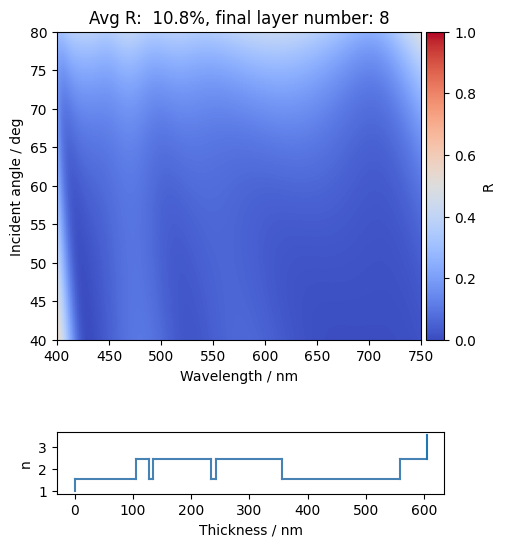

In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': (5, 1), 'hspace': 0.5})

# np.random.seed(1)
# d_init = np.random.rand(200) * 10
# film = TwoMaterialFilm('SiO2', 'TiO2', 'Si', d_init)


film_specs = [film.get_spec(inc_ang=inc_ang, wls=np.linspace(400, 750, 200)) for inc_ang in np.linspace(40., 80., 100)]
r_spec = np.array([film_spec.get_R() for film_spec in film_specs])

ax = axes[0]
im = ax.imshow(
    r_spec, 
    cmap='coolwarm', 
    aspect='auto', 
    extent=[400., 750., 80., 40.], 
    vmax=1, 
    vmin=0
)
ax.invert_yaxis()

# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical', label='R')

ax.set_title(f'Avg R: {r_spec.mean()*100: .1f}%, final layer number: {film.get_layer_number()}')

# print(film.get_layer_number())
# film.remove_negative_thickness_layer(zero=10)
# print(film.get_layer_number())
# ax.plot(film.get_spec().WLS, film.get_spec().get_R(), label='After removal')

ax.set_xlabel('Wavelength / nm')
ax.set_ylabel('Incident angle / deg')
fig.set_size_inches(5, 3)

plot_layer_thickness(film, ax=axes[1])
axes[1].set_ylabel('n')
axes[1].set_xlabel('Thickness / nm')

fig.set_size_inches(5, 6)
fig.savefig('images/anti-reflection/start_200.pdf', bbox_inches='tight')

# 10.8: 200*10nm, seed1, alpha10

In [34]:
def make_antireflector_design():
    inc_angs = np.linspace(40, 80, 2)
    # wls = np.linspace(700, 800, 500) # when wls = 50, ~100 min
    wls = np.linspace(400, 750, 300) # DBR
    R = np.zeros(wls.shape[0] , dtype='float')

    target_spec = [Spectrum(inc_ang, wls, R) for inc_ang in inc_angs]
    return target_spec

target = make_antireflector_design()

np.random.seed(1)
n_init = np.sin(np.linspace(0,2*np.pi, 200) * 5) ** 2 + 1.5
film = FreeFormFilm(n_init, 500, 'Si')
film_init = copy.deepcopy(film)

adam = AdamFreeFormOptimizer(
    film, 
    target, 
    max_steps=200, 
    remove_nonpos_during_optm=False, 
    show=True, 
    show_condition=lambda i: i % 10 == 0, 
    alpha=.1, 
    n_max=2.5, 
    n_min=1.5, 
    # record=lambda i: i == 1999
)
adam.optimize()

  0%|          | 1/200 [00:00<00:22,  8.85it/s]

iter 0, loss 0.33134890794195665


  6%|▋         | 13/200 [00:01<00:16, 11.26it/s]

iter 10, loss 0.281637265280457


 12%|█▏        | 23/200 [00:02<00:15, 11.31it/s]

iter 20, loss 0.26378062553228077


 16%|█▌        | 31/200 [00:02<00:15, 10.83it/s]

iter 30, loss 0.2585192289732462


 22%|██▏       | 43/200 [00:03<00:13, 11.45it/s]

iter 40, loss 0.2556703492759228


 26%|██▌       | 51/200 [00:04<00:14, 10.64it/s]

iter 50, loss 0.2547893717343869


 30%|███       | 61/200 [00:05<00:13, 10.29it/s]

iter 60, loss 0.2546348230216303


 36%|███▋      | 73/200 [00:06<00:11, 10.71it/s]

iter 70, loss 0.25448741170840966


 42%|████▏     | 83/200 [00:07<00:10, 11.49it/s]

iter 80, loss 0.2544275546077601


 46%|████▋     | 93/200 [00:08<00:09, 11.63it/s]

iter 90, loss 0.25437071603995853


 52%|█████▏    | 103/200 [00:09<00:08, 11.73it/s]

iter 100, loss 0.2543675290889241


 56%|█████▋    | 113/200 [00:10<00:07, 11.87it/s]

iter 110, loss 0.2543664248302816


 62%|██████▏   | 123/200 [00:10<00:06, 11.78it/s]

iter 120, loss 0.2543660129391667


 66%|██████▋   | 133/200 [00:11<00:05, 11.55it/s]

iter 130, loss 0.2543659754092909


 72%|███████▏  | 143/200 [00:12<00:04, 11.49it/s]

iter 140, loss 0.25436595024457825


 76%|███████▋  | 153/200 [00:13<00:04, 11.50it/s]

iter 150, loss 0.2543659404177237


 82%|████████▏ | 163/200 [00:14<00:03, 11.55it/s]

iter 160, loss 0.25436593840741006


 86%|████████▋ | 173/200 [00:15<00:02, 11.60it/s]

iter 170, loss 0.2543659369616325


 92%|█████████▏| 183/200 [00:16<00:01, 11.40it/s]

iter 180, loss 0.2543659368229365


 96%|█████████▋| 193/200 [00:16<00:00, 11.56it/s]

iter 190, loss 0.25436593660122125


100%|██████████| 200/200 [00:17<00:00, 11.44it/s]


[(<film.FreeFormFilm at 0x7f75d3cf48b0>,), (0.3691900740440918,)]

film has no spec. use 1000 nm


/root/miniconda3/envs/tfnn/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/root/miniconda3/envs/tfnn/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


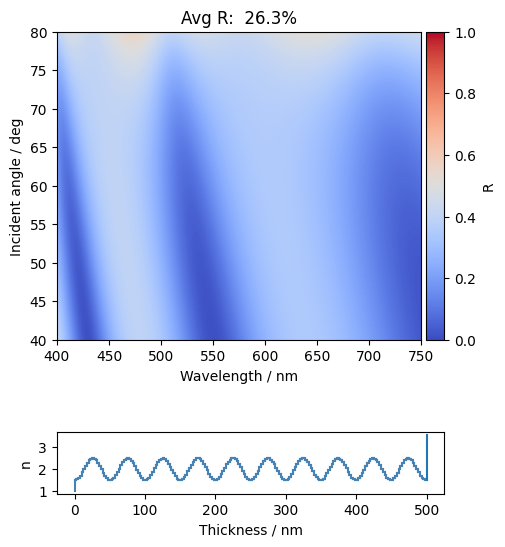

In [37]:

fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': (5, 1), 'hspace': 0.5})
film = film_init
film_specs = [film.get_spec(inc_ang=inc_ang, wls=np.linspace(400, 750, 200)) for inc_ang in np.linspace(40., 80., 100)]
r_spec = np.array([film_spec.get_R() for film_spec in film_specs])

ax = axes[0]
im = ax.imshow(
    r_spec, 
    cmap='coolwarm', 
    aspect='auto', 
    extent=[400., 750., 80., 40.], 
    vmax=1, 
    vmin=0
)
ax.invert_yaxis()

# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical', label='R')

ax.set_title(f'Avg R: {r_spec.mean()*100: .1f}%')

# print(film.get_layer_number())
# film.remove_negative_thickness_layer(zero=10)
# print(film.get_layer_number())
# ax.plot(film.get_spec().WLS, film.get_spec().get_R(), label='After removal')

ax.set_xlabel('Wavelength / nm')
ax.set_ylabel('Incident angle / deg')
fig.set_size_inches(5, 3)

plot_layer_thickness(film, ax=axes[1])
axes[1].set_ylabel('n')
axes[1].set_xlabel('Thickness / nm')

fig.set_size_inches(5, 6)
fig.savefig('images/anti-reflection/free_form_500nm_init.pdf', bbox_inches='tight')
